# Zomato Data Analysis 

Zomato API Analysis is one of the most useful analysis for foodies who want to taste the best cuisines of every part of the world which lies in their budget. This analysis is also for those who want to find the value for money restaurants in various parts of the country for the cuisines. Additionally, this analysis caters the needs of people who are striving to get the best cuisine of the country and which locality of that country serves that cuisines with maximum number of restaurants

In [61]:
import numpy as np 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns #data visualisation
%matplotlib inline

# We will read the Dataset

In [2]:
zomato_df=pd.read_csv("zomato.csv",encoding='latin-1')
zomato_df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


# Understanding the Data

In [3]:
zomato_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

# The columns mentioned in the dataset 
* Restaurant Id: Unique id of every restaurant across various cities of the world
* Restaurant Name: Name of the restaurant
* Country Code: Country in which restaurant is located
* City: City in which restaurant is located
* Address: Address of the restaurant
* Locality: Location in the city
* Locality Verbose: Detailed description of the locality 
* Longitude: Longitude coordinate of the restaurant's location
* Latitude: Latitude coordinate of the restaurant's location
* Cuisines: Cuisines offered by the restaurant
* Average Cost for two: Cost for two people 👫
* Currency: Currency of the country
* Has Table booking: yes/no
* Has Online delivery: yes/ no
* Is delivering: yes/ no
* Switch to order menu: yes/no
* Price range: range of price of food
* Aggregate Rating: Average rating out of 5
* Rating color: depending upon the average rating color
* Rating text: text on the basis of rating of rating
* Votes: Number of ratings casted by people

In [50]:
#zomato_df.info(show_counts=False) # The info() method does not return any value, it prints the information.
zomato_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [5]:
zomato_df.dtypes   #look at the data types for each column

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object

In [6]:
zomato_df.describe() # It will only describe the numeric data columns

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [7]:
zomato_df['Aggregate rating'].describe()  #It will only describe the numeric data columns of the specific column

count    9551.000000
mean        2.666370
std         1.516378
min         0.000000
25%         2.500000
50%         3.200000
75%         3.700000
max         4.900000
Name: Aggregate rating, dtype: float64

In [8]:
zomato_df.shape
#To Display all the numbers of rows and columns

(9551, 21)

Total No of Rows and columns

## Data Analysis 
    Check Missing Values

In [9]:
zomato_df.isnull()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9547,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9548,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9549,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


It will return True for missing components and False for non-missing cells. 
However, when the dimension of a dataset is large, it could be difficult to figure out the existence of missing values.

In [10]:
zomato_df.isnull().values.any()

True

Df.isnull().values.any() returns True when there is at least one missing value occurring in the data.

In [11]:
zomato_df.isnull().sum() 
#To Check the NAN vaues

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

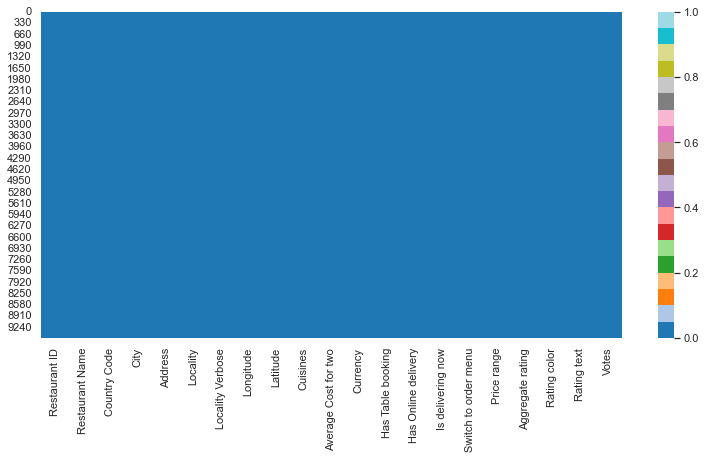

In [52]:
sns.heatmap(zomato_df.isnull(),cmap="tab20")
#sns.heatmap(zomato_df.isnull())
plt.show()         # We are not able to see the 9 records as the NAN value is very small

# Reading an excel file which is attached with the dataset

In [13]:
country_df=pd.read_excel("Country-Code.xlsx") 

In [14]:
country_df.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [15]:
 zomato_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [16]:
#merging the data of country code with main data
zomato_final=pd.merge(zomato_df,country_df, on="Country Code",how="left")

In [18]:
#To check the data types
zomato_final.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
Country                  object
dtype: object

In [53]:
zomato_final.shape

(9551, 22)

In [17]:
zomato_final.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [19]:
zomato_final.columns 
#For all the columns name 

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [20]:
zomato_final['Country'].value_counts() #name of country with no of values

India             8652
United States      434
United Kingdom      80
Brazil              60
UAE                 60
South Africa        60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Singapore           20
Qatar               20
Sri Lanka           20
Canada               4
Name: Country, dtype: int64

Observation- 

1. Zomato is mostly used in India
2. In USA, they just have a website, which they will recommend some kind of restaurants.
3. Main base of Zomato is in India


In [55]:
zomato_final['Country'].value_counts().index
#We will get all the country name with respect to the record

Index(['India', 'United States', 'United Kingdom', 'Brazil', 'UAE',
       'South Africa', 'New Zealand', 'Turkey', 'Australia', 'Phillipines',
       'Indonesia', 'Singapore', 'Qatar', 'Sri Lanka', 'Canada'],
      dtype='object')

In [22]:
a=zomato_final['Country'].value_counts().index
#we are storing this values in 'a' variable which we will use in Pie Plots

([<matplotlib.patches.Wedge at 0x7fb4aa6c1a90>,
 [Text(-1.0829742700952103, 0.19278674827836725, 'India'),
  Text(1.077281715838356, -0.22240527134123297, 'United States'),
  Text(1.0995865153823035, -0.030157837943120734, 'United Kingdom')])

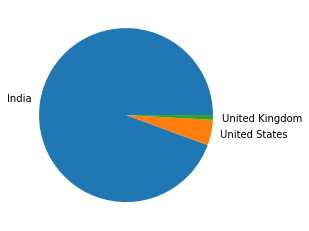

In [24]:
# We will see top 3 countries that uses Zomato
plt.pie(zomato_final['Country'].value_counts()[:3].values,labels = a[:3])

([<matplotlib.patches.Wedge at 0x7fb4aa710d60>,
 [Text(-1.0829742700952103, 0.19278674827836725, 'India'),
  Text(1.077281715838356, -0.22240527134123297, 'United States'),
  Text(1.0995865153823035, -0.030157837943120734, 'United Kingdom')],
 [Text(-0.590713238233751, 0.10515640815183668, '94.39%'),
  Text(0.5876082086391032, -0.12131196618612707, '4.73%'),
  Text(0.5997744629358018, -0.016449729787156763, '0.87%')])

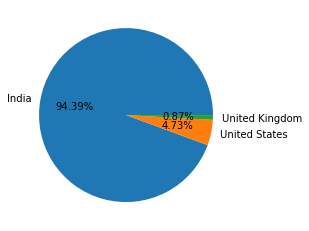

In [25]:
#We will add percentage in the Pie chart 
plt.pie(zomato_final['Country'].value_counts()[:3].values,labels = a[:3],autopct='%.2f%%')

Observation-
1. Most Revenue is generated in India 
2. Max sales in India is approx is 94.32%
3. In United States max sales approx is 4.73%
4. In United Kingdom max sales approx is 0.87%

These are the top 3 countries, most of his business is in India

### The survey seems to have spread across15 countries. This shows that Zomato is a multinational company having actives business in all those countries.

As Zomato is a startup from India hence it makes sense that it has maximum business spread across restaurants in India


# Understanding the Rating aggregate, color and text

In [26]:
ratings=zomato_final.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index()
ratings
# Check the ratings

,Aggregate rating,Rating color,Rating text,0
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


In [27]:
#We have rename the columns ---wherever there is 0 in column it will rename it to Counts
final_ratings=ratings.rename(columns={0:'Counts'})

In [28]:
final_ratings

,Aggregate rating,Rating color,Rating text,Counts
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


In [29]:
final_ratings.head()

,Aggregate rating,Rating color,Rating text,Counts
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15


Observation: 
    
The above information helps us to understand the realation between Aggregate rating, color and text. We conclude the following color assigned to the ratings:
1. Rating 0 - White - Not rated
2. Rating 1.8 to 2.4 - Red - Poor
3. Rating 2.5 to 3.4 - Orange - Average
4. Rating 3.5 to 3.9 - Yellow - Good
5. Rating 4.0 to 4.4 - Green - Very Good
6. Rating 4.5 to 4.9 - Dark Green - Excellent


# We will plot these ratings in a better way so that we can understand in a visualized form

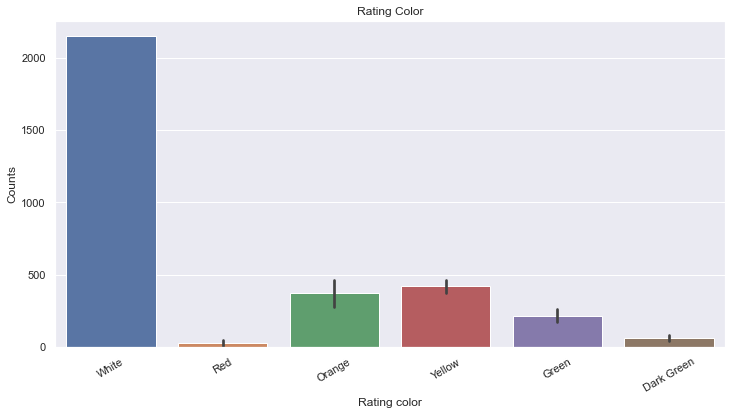

In [58]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=30)
plt.title('Rating Color')
sns.barplot(x=final_ratings['Rating color'], y=final_ratings['Counts']);
#sns.barplot(x=final_ratings['Rating color'], color=['black', 'red', 'green', 'blue', 'cyan']);
plt.show()

<AxesSubplot:xlabel='Aggregate rating', ylabel='Counts'>

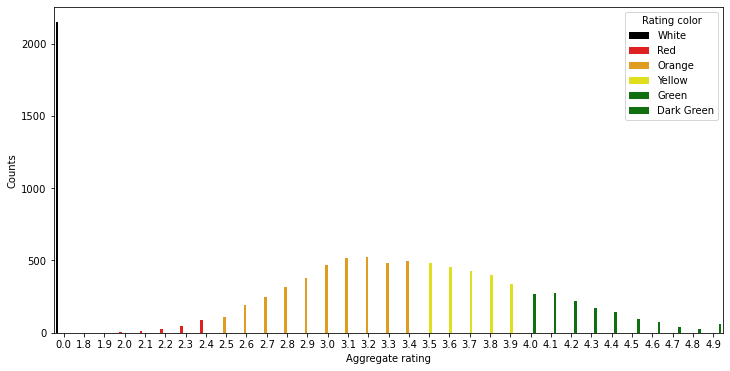

In [31]:
#We will see the relationship b/w Aggregate rating and 0 i.e counts
#plotting the count of rating with the color assigned to them in the dataset 
plt.figure(figsize=(12,6))
sns.barplot(x="Aggregate rating",y="Counts",data=final_ratings,hue="Rating color",palette=["Black","red","orange","yellow","green","green"])

Observation:
1. 0 rating is more than 2000
2. Top rated is 4.9 rating
2. it looks like a Guasian curve i.e Normal distribution

In [33]:
#Let us check who gave the most no. of zero rating country
zero_rating=zomato_final[zomato_final["Aggregate rating"]==0].groupby("Country").size().sort_values(ascending=False).reset_index().rename(columns={0:"Counts"})
zero_rating

,Country,Counts
0,India,2139
1,Brazil,5
2,United States,3
3,United Kingdom,1


# Let us try to understand the coverage of city

In [34]:
#city which has placed the most no. of orders on zomato
zomato_final["City"].value_counts()

New Delhi           5473
Gurgaon             1118
Noida               1080
Faridabad            251
Ghaziabad             25
                    ... 
Panchkula              1
Mc Millan              1
Mayfield               1
Macedon                1
Vineland Station       1
Name: City, Length: 141, dtype: int64

# From which New Delhi Locality maximum restaurants are listed in Zomato

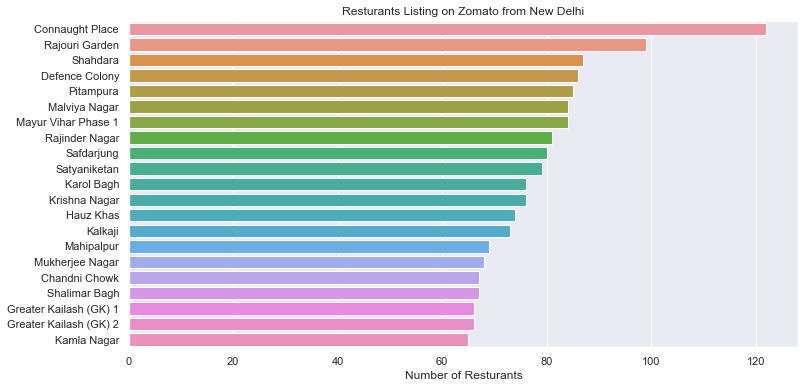

In [41]:
Delhi = zomato_final[(zomato_final.City == 'New Delhi')]
plt.figure(figsize=(12,6))
sns.barplot(x=Delhi.Locality.value_counts().head(21), y=Delhi.Locality.value_counts().head(21).index)

#plt.ylabel(None);
plt.xlabel('Number of Resturants')
plt.title('Resturants Listing on Zomato from New Delhi');

# What kind of Cuisine these highly rates resturants offer

In [45]:
# Achieve this by the following steps

## Fetching the resturants having 'Excellent' and 'Very Good' rating
ConnaughtPlace = Delhi[(Delhi.Locality.isin(['Connaught Place'])) & (Delhi['Rating text'].isin(['Excellent','Very Good']))]

ConnaughtPlace = ConnaughtPlace.Cuisines.value_counts().reset_index()

Cuisine

['North Indian, Chinese, Italian, Continental',
 'Continental, Italian, Asian, Indian',
 'Continental, Mediterranean, Italian, North Indian',
 'Bakery, Desserts, Fast Food',
 'North Indian, Continental',
 'North Indian, European, Asian, Mediterranean',
 'Continental, North Indian, Italian, Asian',
 'North Indian, Afghani, Mughlai',
 'North Indian, European',
 'Cafe',
 'Continental, Mexican, Burger, American, Pizza, Tex-Mex',
 'South Indian',
 'Asian, North Indian',
 'Italian, Mexican, Continental, North Indian, Finger Food',
 'Continental, American, Asian, North Indian',
 'Fast Food, American, Burger',
 'North Indian, Mediterranean, Asian, Fast Food',
 'Ice Cream',
 'Healthy Food, Continental, Italian',
 'Japanese',
 'Modern Indian',
 'Chinese',
 'Continental, North Indian, Chinese, Mediterranean',
 'North Indian, Chinese, Italian, American, Middle Eastern',
 'Biryani, Hyderabadi',
 'Biryani, North Indian, Hyderabadi',
 'North Indian, Chinese',
 'North Indian, Chinese, Continental, Ita

In [37]:
zomato_final["Cuisines"].value_counts()[:20].sort_values(ascending=False)

North Indian                      936
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Pizza, Fast Food                  131
Chinese, Fast Food                118
Mithai, Street Food               116
South Indian                      112
Bakery, Fast Food                 108
Chinese, North Indian             105
Mughlai                           103
Ice Cream, Desserts                83
Ice Cream                          74
North Indian, Fast Food            74
Name: Cuisines, dtype: int64

Observation: 

Top rated resturants seems to be doing well in the following cuisene
1. North Indian
2. Chinese
3. Fast Food
4. Mughlai

# How many of such resturants accept online delivery

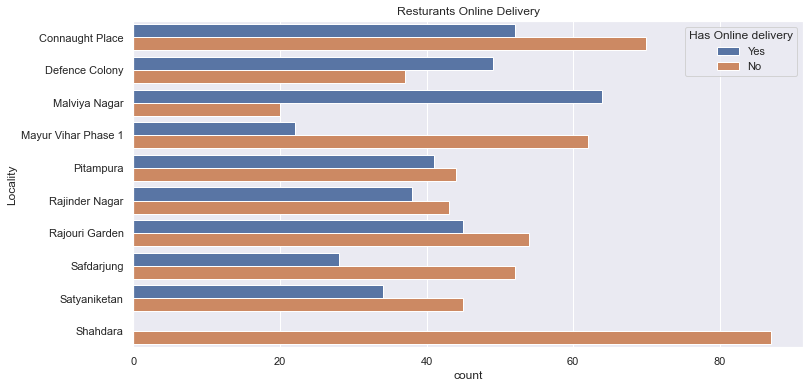

In [48]:
top_locality = Delhi.Locality.value_counts().head(10) #Top 10 localities
sns.set_theme(style="darkgrid")
plt.figure(figsize=(12,6))
#Show the counts of observations in each categorical bin using bars.
online_delivery= sns.countplot(y= "Locality", hue="Has Online delivery", data=Delhi[Delhi.Locality.isin(top_locality.index)])
plt.title('Resturants Online Delivery');

# Rating VS Cost of dinning

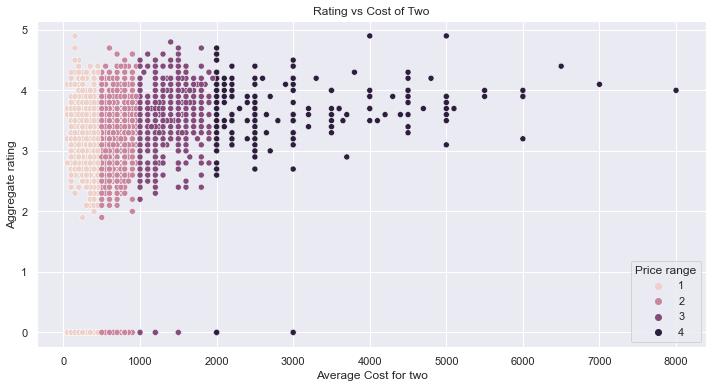

In [39]:
plt.figure(figsize=(12,6))
sns.scatterplot(x="Average Cost for two", y="Aggregate rating", hue='Price range', data=Delhi)

plt.xlabel("Average Cost for two")
plt.ylabel("Aggregate rating")
plt.title('Rating vs Cost of Two');

# Conclusion of the survey:

In [62]:
data=pd.read_csv("employees.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'employees.csv'